# HOTEL BOOKINGS ANALYTICS

### Analize hotel bookings.
<p>The data is from Kaggle:</p> 
<p><u>User:</u> <i>MOJTABA</i></p>
<p><u>Title:</u> <i>Hotel Booking - Hotel booking demand datasets(Data in Brief:2019)</i></p>
<u>Link:</u> https://www.kaggle.com/datasets/mojtaba142/hotel-booking

<p>For this project, I will analyze hotel bookings to continue practicing my analytical skills using my knowledge of <b><i>Python, Excel, and Power BI</i></b>. Machine learning techniques will be applied where possible.</p>

<p>The data is separated into three databases, each corresponding to the years <i>2021, 2022, and 2023</i>. I will analyze the data to visualize <u>how the KPIs change with the years passing by</u>. Because I only have one-year data, I decided to simulate the other years. It is interesting to see the results I will obtain. The importance of this analysis is to continue practicing skills in data analysis, especially when we need to compare metrics across different years.</p>

<p>I will work with the following files: 
<ul>
    <li>
        <b><i>'imb_analytics_2021.xlsx'</i></b>
    </li>
    <li>
        <b><i>'imb_analytics_2022.xlsx'</i></b>
    </li>
    <li>
        <b><i>'imb_analytics_2023.xlsx'</i></b>
    </li>
</ul>
</p>

<p>I will analyze 'Diversity', 'Job Satisfaction', 'Attrition', and more to see how they all changed through the years.</p>

### 1. Import libraries

In [1]:
# Libraries to manipulate the data
import pandas as pd
import numpy as np
import os

# Library to deploy charts with the data
import matplotlib.pyplot as plt

# This is to ignore warnings. Was a recommendation from my friend Manuel Angel Rodriguez Rodriguez
import warnings
warnings.filterwarnings('ignore')


### 2. Importing our data file

<p>Let's import the file I will work with <b><i>'imb_analytics_2021.xlsx'</i></b>, <b><i>'imb_analytics_2022.xlsx'</i></b>, and <b><i>'imb_analytics_2023.xlsx'</i></b> to start the analysis. This is .csv file. First, I will clean and prepare the data for the analysis. Once the data is cleaned, the analysis will begin, and I will look for insights to help the stakeholders make better data-driven decisions.</p>

In [2]:
df_rawdata = pd.read_csv('../hotel_bookings/csv_files/hotel_booking_mojtaba.csv')
df_rawdata.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


##### 2.1 Cleaning the data

<p>Now it's time to view how the data is composed, check for missing values, and select the data I will be working with. Once the data is ready for analysis, I will change the name of the data frame, which is now called 'df_rawdata'.</p>

In [3]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 3 Data Cleaning

<p>Because some columns are useless for the analysis, I will delete them. Those are the ones that store the data of the customers.</p>

<p>I will call the new dataframe as <i>'df_hb'</i>.</p>

In [4]:
# Making a copy of our dataframe
df_hb = df_rawdata.copy()
df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
# Checking for missing values
missing_values = df_hb.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

##### 3.1 Some observations

<p>When looking at the missing values, I discovered that the columns <i>'country', 'agent', and 'company'</i> are the ones with the most missing values. In the future, it will be interesting to know for the hotel which agents are bringing them the most customers. I recommend making an effort to gather the <u>agent or company</u> data to work with them on creating special discounts. </p>

<p>Because I want to work with the <i>'country'</i> column, I will fill in the missing values with the code <b>'OTR'</b>. I want to analyze from which country the customers are most.</p>

<p>I will delete those four missing values from the column <i>'children'</i>; they will not affect our analysis.</p>

In [6]:
# Filling the missing values in the 'country' column
df_hb['country'].fillna('OTR', inplace=True)

# Dropping columns that will not be used in the analysis
df_hb.drop(['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card'], axis='columns', inplace=True)

df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [7]:
# Removing those four missing values from the column 'children'
df_hb.dropna(subset=['children'], inplace=True)

missing_values2 = df_hb.isnull().sum()
print('Number of missing values: ', missing_values2)

Number of missing values:  hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
dtype: int64


In [8]:
df_hb_lens = len(df_hb)
print('Number of rows in the dataframe is: ', df_hb_lens)

Number of rows in the dataframe is:  119386


### 4 Working with the data

<p>With the data clean and ready for analysis, it is time to generate the insights that will help our <b>stakeholders</b> make <u><i>better data-driven decisions.</i></u></p>

##### 4.1 Filter the data

<p>I will separate the data into two categories: <i>City Hotel</i> and a <i>Resort Hotel</i>. Later, I will compare them together to understand their tendencies and seasons.</p>

<p>Let's create the two dataframes.</p>

In [9]:
# CITY HOTEL
df_hb_CH = df_hb.groupby(by=['hotel']).get_group('City Hotel')

df_hb_CH.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,A,0,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,A,0,No Deposit,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,A,0,No Deposit,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,A,0,No Deposit,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,A,0,No Deposit,Transient,76.5,0,1,Canceled,2015-04-02


In [10]:
# RESORT HOTEL
df_hb_RH = df_hb.groupby(by=['hotel']).get_group('Resort Hotel')

df_hb_RH.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03


##### 4.2 City Hotel Analysis

<p>I will fix the values in the column <i>'is_canceled'</i>. I will replace the 0 and 1 for the values where <u>0 = canceled</u> and <u>1 = not canceled</u>. I'm aware I can do this step earlier, but for the purpose of practicing, I decided to do it twice, one time for each dataframe.</p>

<p>Let's go there</p>

In [11]:
# Changing the values
cancel = {
    0: 'canceled',
    1:'not canceled'
}

df_hb_CH['is_canceled'] = df_hb_CH['is_canceled'].map(cancel)

df_hb_CH['is_canceled'].head(5)

40060        canceled
40061    not canceled
40062    not canceled
40063    not canceled
40064    not canceled
Name: is_canceled, dtype: object

##### 4.2.a Canceled Reservations

<p>This database has data for reservations from the years <i>2015, 2016,</i> and <i>2017</i>. So, first, I will look at the cancellations as a total of those 3 years, and then I will <b>separate</b> the data <u>individually by year</u>.</p>

<p>It will allow stakeholders to know the <i>overall number of cancellations and then be able to compare by year</i>.</p>

canceled        46228
not canceled    33098
Name: is_canceled, dtype: int64


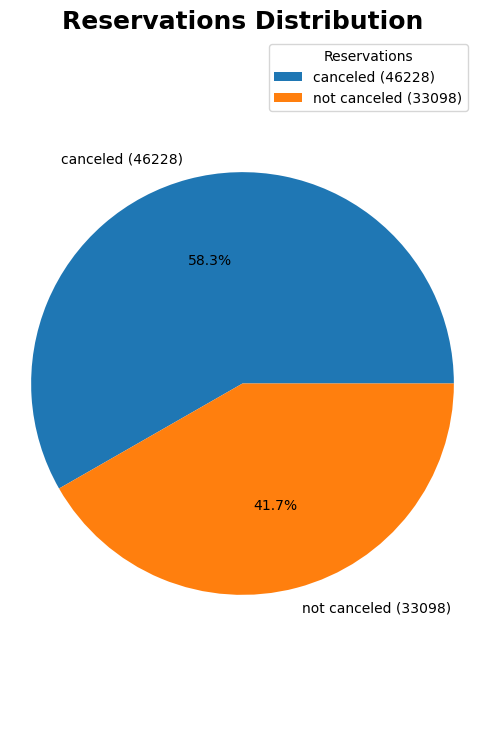

In [14]:
# Counting the canceled or not canceled reservations values and storage them into a variable - CITY HOTEL
canceled_counts = df_hb_CH['is_canceled'].value_counts()
print(canceled_counts)

# Total and percentage variables to use on our charts
total_count = canceled_counts.sum()
canceled_percentage = (canceled_counts / total_count) * 100

# labels = canceled_counts.index
# Using a function to create the labels
labels = [f'{canceled} ({count})' for canceled, count in zip(canceled_counts.index, canceled_counts)]

# Chart size
fig, ax = plt.subplots(figsize=(6, 9))

# Chart generation
plt.pie(canceled_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Reservations')
ax.set_title('Reservations Distribution over Three Years', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

<p>The data shows that over the past three years, there have been <u>more canceled</u> reservations, with a <b>total percentage of 58.3%</b>.</p>

<p>Let's analyze which of the three years shows the most canceled reservations.</p>